In [5]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp
from scipy.special import comb
from scipy.misc import factorial
from decimal import Decimal
import math
import itertools
import sys
import os
import seaborn as sns
sys.path.insert(0, 'C:/Users/Stephanie/Documents/GitHub/mwc_induction/code/analysis')
import mwc_induction_utils as mwc
mwc.set_plotting_style()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In this notebook we consider the effect of $\Delta \varepsilon_{AI}$ on simple repression systems. Specifically, we look at how repressor titration experiments similar to those in Garcia 2011 will shift as $\Delta \varepsilon_{AI}$ is changed. 

In [16]:
def simple_known(R, e_AI, Op):
    '''
    Computes the fold-change
    Parameters
    ----------
    R : array-like
        Array with the values of all repressor copy numbers
    e_AI : float
        Energetic difference between the active and inactive state
    Op : float
        Binding energy between operator and repressor as inferred in Garcia 2011
    Returns
    -------
    fold-change
    '''
    NNS = 4600000
    return 1/(1 + (1/(1 + np.exp(-e_AI)))*(R/NNS)*np.exp(-Op))

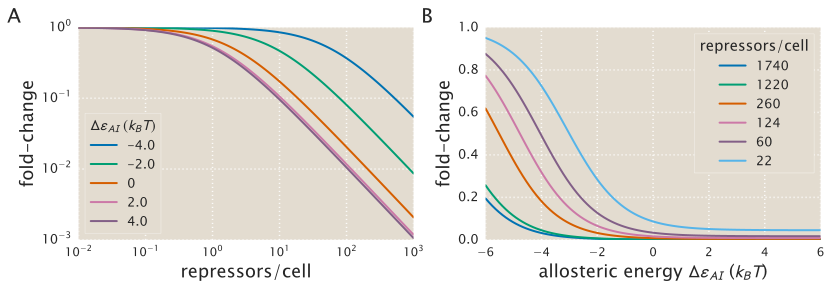

In [17]:
# Make plots showing a) fold-change vs repressors/cell and b) fold-change vs e_AI

# Establish parameters
O1 = -15.3
e_AI_vals_a = [-4.0, -2.0, 0, 2.0, 4.0]
e_AI_vals_b = np.linspace(-6.0, 6.0, 100)
R_a = np.logspace(-2, 3, 100)
R_b = np.array((1740, 1220, 260, 124, 60, 22))

# Set color map
colors = sns.color_palette('colorblind', n_colors=7)
colors[4] = sns.xkcd_palette(['dusty purple'])[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11.5, 4))

for i in range(len(e_AI_vals_a)):
    ax[0].loglog(R_a, simple_known(R_a, e_AI_vals_a[i], O1), color=colors[i], label=e_AI_vals_a[i])

for j in range(len(R_b)):
    ax[1].plot(e_AI_vals_b, simple_known(R_b[j], e_AI_vals_b, O1), color=colors[j], label=R_b[j])

ax[0].set_xlabel('repressors/cell')
ax[0].set_ylabel('fold-change')
ax[1].set_xlabel(r'allosteric energy $\Delta \varepsilon_{AI}$ ($k_BT$)')
ax[1].set_ylabel('fold-change')
leg_a = ax[0].legend(loc='lower left', title=r'$\Delta \varepsilon_{AI}\ (k_BT)$')
leg_a.get_title().set_fontsize(15)
leg_b = ax[1].legend(loc='upper right', title=r'repressors/cell')
leg_b.get_title().set_fontsize(15)
plt.figtext(0, 0.95, 'A', fontsize=20)
plt.figtext(0.5, 0.95, 'B', fontsize=20)

plt.tight_layout()
#plt.savefig('simplerep.pdf', bbox_inches='tight')